# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
country = []
date = []
new_cities = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append((response['coord']['lon']))
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_cities.append(city)
        print(f"Processing {city} found!.")
    except:
        print(f'{city} result does not exist')
        pass

Processing juuru found!.
Processing jamestown found!.
samusu result does not exist
Processing soure found!.
Processing kahului found!.
Processing chuy found!.
Processing tayga found!.
Processing punta arenas found!.
Processing verkhnyaya inta found!.
Processing barrow found!.
Processing ushuaia found!.
Processing mataura found!.
Processing onokhino found!.
Processing meulaboh found!.
Processing rikitea found!.
Processing yellowknife found!.
Processing narsaq found!.
illoqqortoormiut result does not exist
Processing new norfolk found!.
Processing puerto ayora found!.
Processing bluff found!.
Processing hobart found!.
Processing norman wells found!.
Processing awbari found!.
Processing guerrero negro found!.
Processing zhezkazgan found!.
Processing brasileia found!.
Processing vaini found!.
Processing souillac found!.
Processing busselton found!.
Processing tazovskiy found!.
Processing seoul found!.
Processing mangrol found!.
Processing yebaishou found!.
Processing hithadhoo found!.
Proc

Processing katsuura found!.
Processing khanpur found!.
Processing urubicha found!.
Processing lagos found!.
tsihombe result does not exist
Processing hirara found!.
Processing jalpan found!.
Processing yacuiba found!.
Processing umm kaddadah found!.
Processing maramba found!.
Processing portland found!.
Processing port hardy found!.
Processing mount isa found!.
Processing salalah found!.
Processing henties bay found!.
Processing ravar found!.
Processing abbeville found!.
Processing gorele found!.
Processing lavrentiya found!.
Processing ilulissat found!.
Processing namibe found!.
Processing te anau found!.
Processing port lincoln found!.
Processing esso found!.
Processing kapit found!.
Processing vuktyl found!.
Processing kulhudhuffushi found!.
satitoa result does not exist
Processing baruun-urt found!.
Processing lodja found!.
Processing ostrovnoy found!.
Processing maltahohe found!.
Processing tessalit found!.
candawaga result does not exist
Processing afsin found!.
Processing taltal

Processing ende found!.
Processing san-pedro found!.
Processing rudnichnyy found!.
Processing byron bay found!.
Processing alexandria found!.
Processing tsumeb found!.
Processing cuamba found!.
Processing cururupu found!.
Processing kyabe found!.
Processing wonthaggi found!.
Processing flinders found!.
Processing saint-pierre found!.
Processing brownsville found!.
Processing dunedin found!.
Processing barranca found!.
Processing simav found!.
Processing cajetina found!.
Processing les cayes found!.
Processing gresham found!.
Processing dover found!.
Processing faya found!.
Processing terrace found!.
Processing copiapo found!.
Processing kalisz found!.
Processing allapalli found!.
Processing cap-aux-meules found!.
Processing margate found!.
Processing qasigiannguit found!.
Processing pozo colorado found!.
Processing correntina found!.
Processing sao felix do xingu found!.
Processing arlit found!.
Processing maarianhamina found!.
Processing trofaiach found!.
Processing alofi found!.
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_dict = {
    "City": new_cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Cloudiness": cloudiness,
    "Country": country,
    "Data Receiving Time (GMT)": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)
0,juuru,59.06,24.96,48.20,100,9.17,90,EE,1603732219
1,jamestown,42.10,-79.24,48.99,100,3.36,90,US,1603732414
2,soure,-0.72,-48.52,87.40,61,12.37,0,BR,1603732220
3,kahului,20.89,-156.47,75.20,69,6.76,20,US,1603731829
4,chuy,-33.70,-53.46,60.67,95,14.47,100,UY,1603731897
...,...,...,...,...,...,...,...,...,...
567,alofi,-19.06,-169.92,74.66,84,22.82,99,NU,1603731964
568,tsabong,-26.02,22.40,88.39,21,11.92,32,BW,1603732271
569,talara,-4.58,-81.27,77.00,65,11.41,0,PE,1603731997
570,pilna,55.55,45.92,31.93,95,4.21,42,RU,1603732271


In [16]:
weather_data.describe()

,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Data Receiving Time (GMT)
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,18.967360,17.941224,59.258042,71.674825,8.507273,53.318182,1.603732e+09
std,34.075419,91.705372,23.405442,21.663706,5.716562,37.720469,1.931441e+02
min,-54.800000,-179.170000,-4.000000,1.000000,0.130000,0.000000,1.603732e+09
25%,-9.617500,-62.162500,44.047500,62.000000,4.000000,18.000000,1.603732e+09
50%,22.160000,23.400000,63.660000,77.000000,7.495000,61.500000,1.603732e+09
75%,49.557500,96.077500,78.010000,87.000000,11.410000,90.000000,1.603732e+09
max,78.220000,179.320000,104.000000,100.000000,40.260000,100.000000,1.603732e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
humidity_over = weather_data.loc[(weather_data['Humidity'] > 100)]
humidity_over

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)


In [79]:
#  Get the indices of cities that have humidity over 100%.


In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

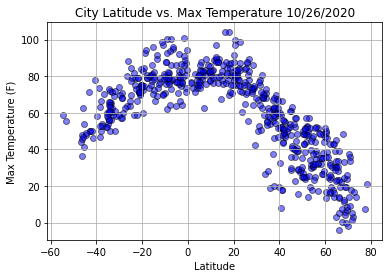

In [18]:
latitude = weather_data['Latitude']

plt.scatter(latitude,weather_data['Max Temperature'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature 10/26/2020')
plt.grid()
plt.show()

#As postulated in the instructions, temperatures rise in general when approaching the equator,
#since there are negative values associated with the southern hemisphere, the shape is seen
#as more of a parabola.

## Latitude vs. Humidity Plot

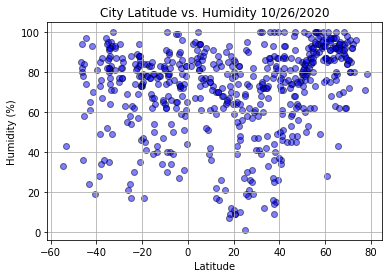

In [19]:
plt.scatter(latitude,weather_data['Humidity'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity 10/26/2020')
plt.grid()
plt.show()

#Visually, there doesn't seen to be much of a relationship between humidity and latitude,
#there does appear to be clustering at 70% and above humidity throughout all locations. 

## Latitude vs. Cloudiness Plot

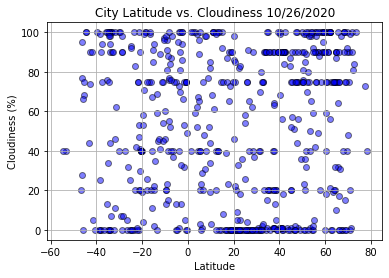

In [20]:
plt.scatter(latitude,weather_data['Cloudiness'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness 10/26/2020')
plt.grid()
plt.show()

#Like humidity, cloudiness does not appear to have much relationship with a location's
#latitude, the cloudiness percentages appear to be reported on more regimented increments
#leading to lines of markers across the gridlines.

## Latitude vs. Wind Speed Plot

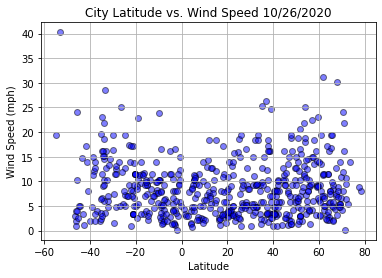

In [21]:
plt.scatter(latitude,weather_data['Wind Speed'],marker="o",facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed 10/26/2020')
plt.grid()
plt.show()

#Again, there does not appear to be much relationship between wind speed and latitude;
#but kind of in an inverse of the humidity plot, there are not too many values above 
#25 mph. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

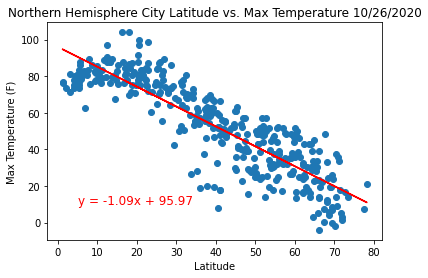

The r-value is -0.8721377844071486


In [22]:
northern_hem = weather_data.loc[(weather_data['Latitude'] > 0)]
northern_lat = northern_hem['Latitude']

plt.scatter(northern_lat,northern_hem['Max Temperature'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Max Temperature'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

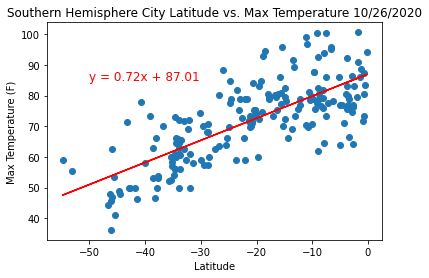

The r-value is 0.7461947494699251


In [24]:
southern_hem = weather_data.loc[(weather_data['Latitude'] < 0)]
southern_lat = southern_hem['Latitude']

plt.scatter(southern_lat,southern_hem['Max Temperature'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Max Temperature'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-50,85),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#Both northern and southern hemisphere plots show relatively strong correlation,
#going in opposite directions as we would expect. There is a slightly stronger correlation 
#in the northern hemisphere with more scattering seen in the southern graph. It is somewhat 
#notable that there is almost a perfect exact -1 slope for the northern hemisphere, showing
#that for every degree you move north from the equator you would see 1 degree less Fahrenheit. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

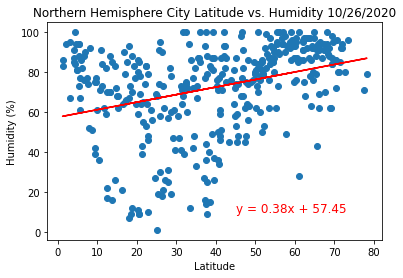

The r-value is 0.3333429344051427


In [27]:
plt.scatter(northern_lat,northern_hem['Humidity'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Humidity'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(45,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

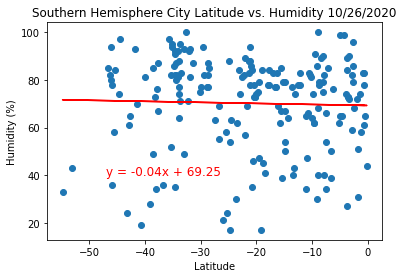

The r-value is -0.030185451702764144


In [28]:
plt.scatter(southern_lat,southern_hem['Humidity'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidity 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Humidity'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-47,40),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#There is much less relationship seen with humidity and latitude than we saw with temperature,
#with the greater of the 2 correlation coefficients being only 0.33 in the nothern hemisphere,
#but this is significant more than seen in the south, showing basically no relationship. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

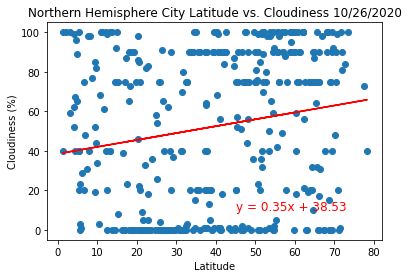

The r-value is 0.18101396287369295


In [29]:
plt.scatter(northern_lat,northern_hem['Cloudiness'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Cloudiness'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(45,10),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

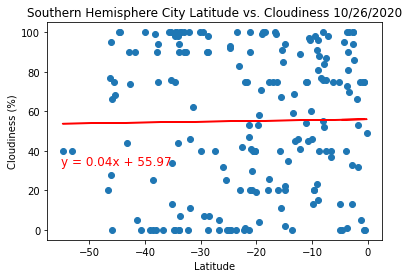

The r-value is 0.015205818001136257


In [30]:
plt.scatter(southern_lat,southern_hem['Cloudiness'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Cloudiness'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-55,33),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#As we saw on the visual breakdown of all the cities previously, there is almost no relationship
#on the cloudiness here at all. This does make logical sense though, given that cloudiness
#is more localized than some of our other weather measures.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

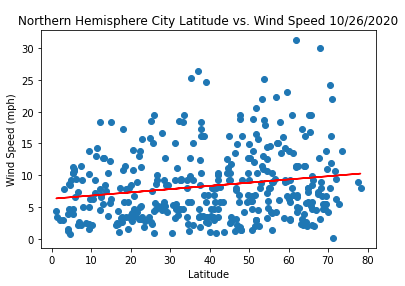

The r-value is 0.18222898495771717


In [31]:
plt.scatter(northern_lat,northern_hem['Wind Speed'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed 10/26/2020')
slope, intercept, r, p, std_err = linregress(northern_lat,northern_hem['Wind Speed'])
fit = slope * northern_lat + intercept
plt.plot(northern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(5,35),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

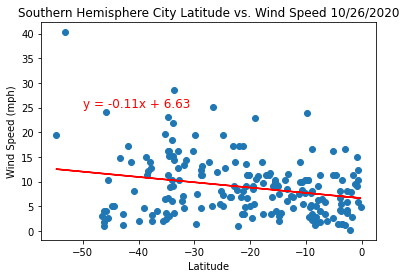

The r-value is -0.24326522053926047


In [32]:
plt.scatter(southern_lat,southern_hem['Wind Speed'],marker="o")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed 10/26/2020')
slope, intercept, r, p, std_err = linregress(southern_lat,southern_hem['Wind Speed'])
fit = slope * southern_lat + intercept
plt.plot(southern_lat,fit,color='r')
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq,(-50,25),fontsize=12,color="red")
plt.show()
print(f'The r-value is {r}')

#Again there is limited to no relationship shown, but as kind of an inverse of the humidity numbers.

In [33]:
weather_data.to_csv('../weather_data.csv')